# Question 1:

### Part A: Exploratory data analysis and identifying the parameters.

#### Step 1: Load the Dataset and import libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv("sgemm_product.csv")
raw_df.shape

(241600, 18)

#### Step 2: Check for missing column headers:

In [89]:
raw_df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [90]:
raw_df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


The dataset has 18 parameters, and each column has a name, as can be seen.

#### Step 3: Missing Value Check

In [91]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


All columns have a primary data type and have non-null values.
We can confirm this further with:

In [92]:
raw_df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

#### Step 4: Efficient understanding of variables

In [93]:
raw_df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


Since we will use the average of the THREE (3) runs with long performance times for each data record, let's combine them into a single column with this average value.

In [94]:
def Average(lst):
    return sum(lst) / len(lst)

avgOf3Highest_Col = []

for index, row in raw_df.iterrows():
    tmp = [row['Run1 (ms)'],row['Run2 (ms)'],row['Run3 (ms)'],row['Run4 (ms)']]
    tmp.remove(min(tmp))
    avgOf3Highest_Col += [Average(tmp)]


In [95]:
raw_df['AvgRuntime'] = avgOf3Highest_Col
df = raw_df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,AvgRuntime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.740000
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.896667
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.806667
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,87.410000
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,119.946667


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.00,32.000000,64.000000,128.000000,128.000000
NWG,241600.0,80.415364,42.469220,16.00,32.000000,64.000000,128.000000,128.000000
KWG,241600.0,25.513113,7.855619,16.00,16.000000,32.000000,32.000000,32.000000
MDIMC,241600.0,13.935894,7.873662,8.00,8.000000,8.000000,16.000000,32.000000
NDIMC,241600.0,13.935894,7.873662,8.00,8.000000,8.000000,16.000000,32.000000
MDIMA,241600.0,17.371126,9.389418,8.00,8.000000,16.000000,32.000000,32.000000
NDIMB,241600.0,17.371126,9.389418,8.00,8.000000,16.000000,32.000000,32.000000
KWI,241600.0,5.000000,3.000006,2.00,2.000000,5.000000,8.000000,8.000000
VWM,241600.0,2.448609,1.953759,1.00,1.000000,2.000000,4.000000,8.000000
VWN,241600.0,2.448609,1.953759,1.00,1.000000,2.000000,4.000000,8.000000


array([[<AxesSubplot:title={'center':'MWG'}>,
        <AxesSubplot:title={'center':'NWG'}>,
        <AxesSubplot:title={'center':'KWG'}>,
        <AxesSubplot:title={'center':'MDIMC'}>],
       [<AxesSubplot:title={'center':'NDIMC'}>,
        <AxesSubplot:title={'center':'MDIMA'}>,
        <AxesSubplot:title={'center':'NDIMB'}>,
        <AxesSubplot:title={'center':'KWI'}>],
       [<AxesSubplot:title={'center':'VWM'}>,
        <AxesSubplot:title={'center':'VWN'}>,
        <AxesSubplot:title={'center':'STRM'}>,
        <AxesSubplot:title={'center':'STRN'}>],
       [<AxesSubplot:title={'center':'SA'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'AvgRuntime'}>, <AxesSubplot:>]],
      dtype=object)

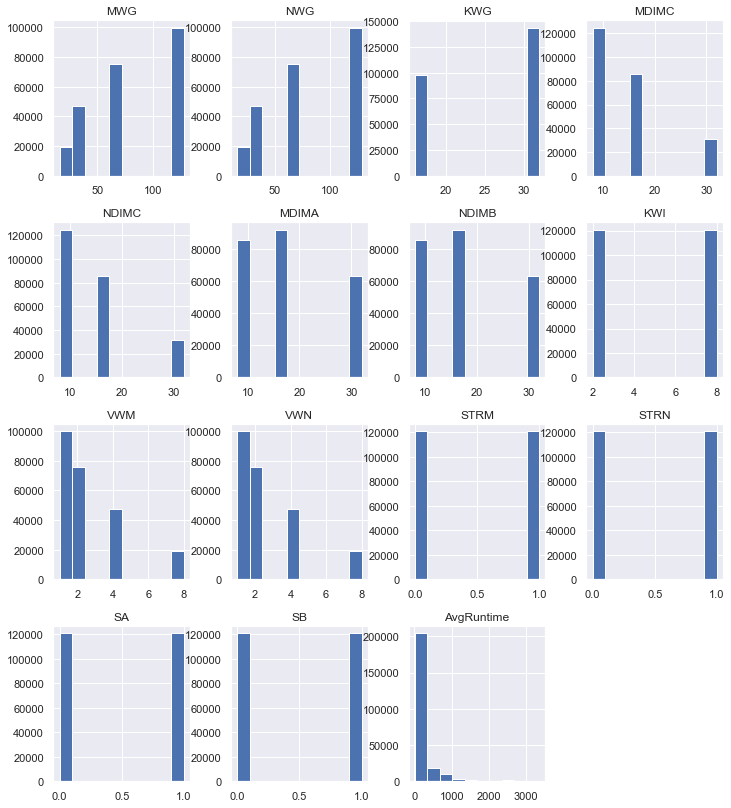

In [97]:
sns.set()
df.hist(figsize=(12,14))

#### Step 5: Outlier deletion

In [98]:
Quartile1=df['AvgRuntime'].quantile(0.25)
Quartile3=df['AvgRuntime'].quantile(0.75)
IQR = Quartile3 - Quartile1
MIN = Quartile1-1.5*IQR
MAX = Quartile3+1.5*IQR
df = df[(df.AvgRuntime>MIN) & (df.AvgRuntime<MAX)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214888.0,75.701128,41.971140,16.00,32.000000,64.000000,128.000000,128.000000
NWG,214888.0,75.772011,41.998881,16.00,32.000000,64.000000,128.000000,128.000000
KWG,214888.0,25.591378,7.840140,16.00,16.000000,32.000000,32.000000,32.000000
MDIMC,214888.0,14.474926,8.110416,8.00,8.000000,16.000000,16.000000,32.000000
NDIMC,214888.0,14.469789,8.110660,8.00,8.000000,16.000000,16.000000,32.000000
MDIMA,214888.0,17.390566,9.375176,8.00,8.000000,16.000000,32.000000,32.000000
NDIMB,214888.0,17.388705,9.374530,8.00,8.000000,16.000000,32.000000,32.000000
KWI,214888.0,5.005389,3.000002,2.00,2.000000,8.000000,8.000000,8.000000
VWM,214888.0,2.339763,1.858823,1.00,1.000000,2.000000,4.000000,8.000000
VWN,214888.0,2.345603,1.862676,1.00,1.000000,2.000000,4.000000,8.000000


#### Step 5: Identifying the parameters

Check the distribution of our Target

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AvgRuntime', ylabel='Density'>

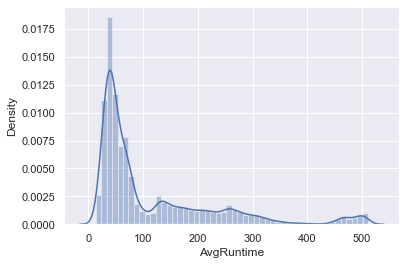

In [99]:
sns.distplot(df['AvgRuntime'])

This Average Runtime histogram shows a logarithmic distribution, this means that we will greatly benefit if we transform it logarithmically.

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

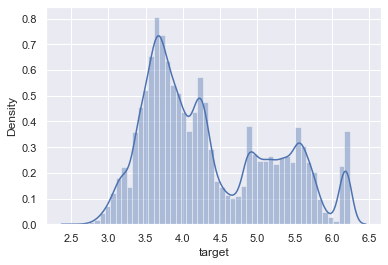

In [100]:
df['target']=np.log(df.AvgRuntime)
sns.distplot(df['target'])

Now we have a easily visible normal distribution for our target variable.

Hence, It is easy to see correlations between features and the target variable.

Text(0.5, 1.0, 'Correlation of Parameters with target')

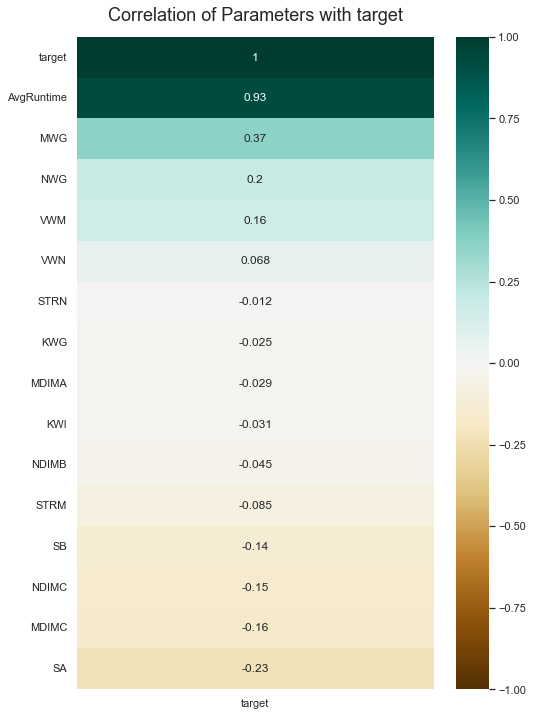

In [101]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of Parameters with target', fontdict={'fontsize':18}, pad=16)

Hence, we can choose the best three parameters as the one's who are more correlated: MWG(0.37), SA(-0.23) , NWG(0.2).

### Part B: Designing a linear regression model to estimate the target using only the best three (3) parameters from the dataset

We have already taken the average of the THREE (3) runs with long performance times for each data record and concluded the best three (3) parameters from the dataset. Now to design the linear regression model

Keep only the 3 most correlated(best) parameters

In [107]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = df.filter(['MWG', 'NWG', 'SA', 'target'])

Split the Dataset into Train Set and Test Set

In [103]:
x = df.drop(['target'],axis=1).values
y = df['target'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


Create and Train the model

In [104]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

3.5764620572741226
[ 0.00778978  0.00478809 -0.36284196]


#### Hence, We get the linear regression equation obtained from learning the dataset as
##### Y = 3.5764620572741226 + 0.00778978 * x1(MWG) + 0.00478809 * x2(NWG) - 0.36284196 * x3(SA)

Therefore, since the average runtime (Target) is typically large (mean = 75), we may conclude that MWG and NWG are positively connected with the target with a low coefficient of variation. However, because the constant is negative, SA is negatively associated with the objective.

Scaling data may improve performance, but not by much. This is due to the parameters MWG and NWG being between (16,128) and SA being between (0,1). Conflict develops when one parameter is biased in that direction. Scaling or normalizing the data need to be a requirement here as well, if only for good measure.

However, increasing the number of factors beyond 3 based on stronger correlation will undoubtedly improve performance. The fact that most correlated parameters lower the error allows us to make this observation. The ideal amount of parameters to utilize is when error does not significantly decrease over time. However, our model demonstrates that even with just the three best values, the MSE is still very high.

### Part C: Assessing the performance of the linear regressor

Predict the values of y using the linear regression model and the x_test values.

In [105]:
y_pred = linreg.predict(x_test)

Evaluating the Model:

In [108]:
print("MSE = %.2f" % mean_squared_error(y_test,y_pred))
print("MAE = %.2f" % mean_absolute_error(y_test,y_pred))
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Acc = r2_score(y_test,y_pred)*100
print("Accuracy of the model based on r2_score is %.2f" %Acc)


MSE = 0.55
MAE = 0.62
Accuracy of the model based on r2_score is 23.45


#### _**r_2 Score:**_ It is a value in percentage of variance in the dependent variable that is predictable from the independent variables here. It shows the accuracy between the predicted values and the true values of the Target(Y). A low value here in our model shows a low level of correlation, meaning that this regression model is not exactly very accurate.




#### _**Mean square error:**_ It is the average of the square of errors. A value of 0.55 in our model shows the difference between all of the predicted values and observed values squared. MSE in our model is 0.55 suggesting that it has a lot of room for improvement. MSE is very important in the way that it can show us which and how many features will reduce the error resulting in a better model. It is relative to each model, and it can tell us a lot about exactly which features to use as well.

#### _**Mean Absolute error:**_ It is the average of the square of errors. A value of 0.62 in our model shows the average difference between all of the predicted values and observed values. MSE in our model is 0.62 which goes to show that it can be improved. MAE is very important because the units of the error score match the units of the target value being predicted and the fact that MAE changes linearly. The importance of MAE is that it does not allow outliers to play a major role in the error calculation.